# R-Squared

R-squared란? 모델이 데이터에 얼마나 적합한지 수치적으로 결정하는 방법입니다. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import random
%matplotlib inline

# MSE(Mean Squared Error)

$$ \frac{(실제값 - 에측값)^2}{데이터수} $$

In [2]:
x = [[1], [2], [3], [4], [5]]
y = [[1], [5],[6], [7], [11]]
x = np.array(x)
y = np.array(y)
mean = (1+5+6+7+11)/5 #데이터의 평균값
print(y)

[[ 1]
 [ 5]
 [ 6]
 [ 7]
 [11]]


Text(0, 0.5, 'Y')

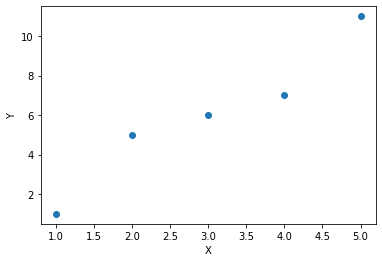

In [3]:
plt.plot(x, y, marker='o', linestyle=' ')
plt.xlabel('X')
plt.ylabel('Y')

In [4]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

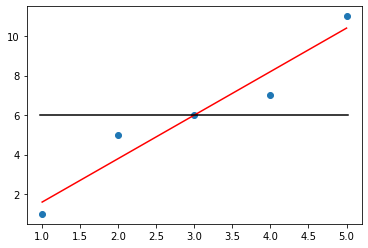

In [5]:
plt.plot(x, y, marker='o', linestyle = ' ')
plt.plot(x, lr.predict(x), color = 'red')
plt.axhline(y = mean, xmin = 0.04, xmax = 0.96, color = 'black')

In [6]:
mean_squared_error(y, lr.predict(x))

0.7200000000000001

In [7]:
print(lr.predict(x))

[[ 1.6]
 [ 3.8]
 [ 6. ]
 [ 8.2]
 [10.4]]


In [27]:
def myMSE(X, Y, line): 
    err=0
    #for i in range(len(X)):        #예측값 MSE 구하기
    #        err +=(Y[i][0]-line[i][0])**2 
    
    if (str(type(line)) == "<class 'float'>"): #평균 MSE 구하기
        for i in range(len(X)):
            err += (Y[i][0]-line)**2
        
    else:
        for i in range(len(X)):        #예측값 MSE 구하기
             err +=(Y[i][0]-line[i][0])**2 
    
    
    MSE = err/len(X) 
    return MSE

In [28]:
print("MSE : ", myMSE(x, y,lr.predict(x)))

MSE :  0.7200000000000001


# R squared

$$ R^2 = 1 - \frac{M\!S\!E\;of\;regression \;line}{M\!S\!E\;of\;the\;average\;of\;the\;data}$$

In [29]:
lr.score(x, y)

0.9307692307692308

In [30]:
def myRsq(X, Y, model):
    
    #평균구하기
    hap = 0
    for i in range(len(X)):
        hap += Y[i][0]
    mean = float(hap/len(X))
    print("평균 :", mean)
    
    #모델fit하기
    model.fit(X,Y)
    
    #MSE와 R-squared구하기
    reg_mse = myMSE(X,Y,model.predict(X))
    avg_mse = myMSE(X,Y,mean)
    r = 1-(reg_mse/avg_mse)  # unsupported operand type(s) for /: 'float' and 'NoneType'
    
    #출력
    #print("MSE of regression line : ", reg_mse)
    #print("MSE of average line : ", avg_mse)
    print("R-squared : ", r)
    

In [31]:
myRsq(x, y, LinearRegression())

평균 : 6.0
R-squared :  0.9307692307692308


### 100개 데이터로 해보기
### 데이터가 선형모델에 적합한 경우

#### 1. 데이터 만들기

In [32]:
data=100 #데이터 개수 정하기

In [33]:
#x_train 데이터 만들기
x_train=[]
for i in range(1,data+1):
    x_train.append([i])
    
x_train=np.array(x_train)
x_train.shape

(100, 1)

In [34]:
#y_train 데이터 만들기
y_train1=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
    y_train1.append([i+random.uniform(-20, 20)])#난수발생시켜서 노이즈 만들기

y_train1=np.array(y_train1)
y_train1.shape

(100, 1)

Text(0, 0.5, 'Y')

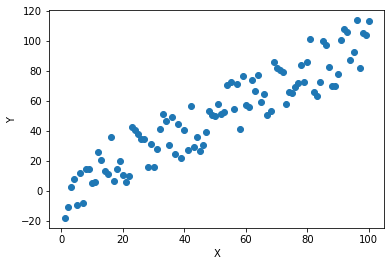

In [35]:
plt.plot(x_train, y_train1, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

#### 2. 모델에 넣기

In [36]:
lr.fit(x_train,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#평균값 구하기
mean=0
for i in y_train1:
    for j in i:
        mean+=j
mean= mean/data
print(mean)

50.274713657392724


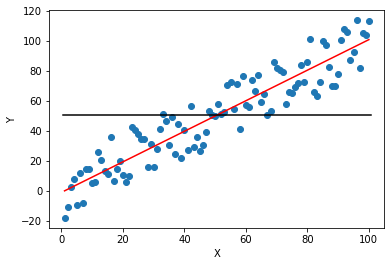

In [38]:
#예측한 값과 평균 그려보기
plt.plot(x_train, y_train1,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

함수와 내가 만든 함수 비교하기

In [40]:
lr.score(x_train,y_train1)

0.8650536059975873

In [41]:
myRsq(x_train, y_train1, LinearRegression())

평균 : 50.274713657392724
R-squared :  0.8650536059975873


### 데이터가 선형모델에 부적합한 경우

In [42]:
y_train2=[]
for i in range(1,data+1): #y_train에 노이즈를 만들어서 넣기
    y_train2.append([i+random.uniform(-400, 400)])#난수발생시켜서 노이즈 만들기

y_train2=np.array(y_train2)
y_train2.shape

(100, 1)

Text(0, 0.5, 'Y')

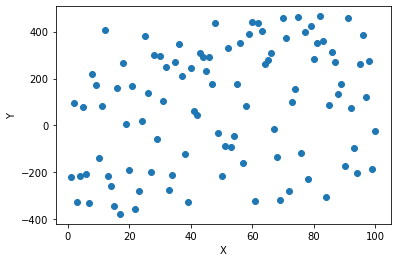

In [43]:
plt.plot(x_train, y_train2, marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')

In [44]:
mean=0
for i in y_train2:
    for j in i:
        mean+=j
mean= mean/data
print(mean)

81.99048848928408


In [45]:
lr.fit(x_train,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

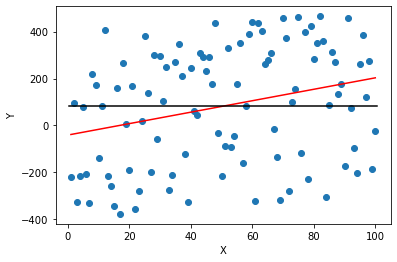

In [46]:
plt.plot(x_train, y_train2,marker='o',linestyle='')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x_train,lr.predict(x_train),color = 'red')
plt.axhline(y=mean, xmin=0.04, xmax=0.96, color = 'black')

In [47]:
lr.score(x_train,y_train2)

0.07799910661544662

In [48]:
myRsq(x_train, y_train2, LinearRegression())

평균 : 81.99048848928408
R-squared :  0.07799910661544585
